In [47]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
from junifer.storage import HDF5FeatureStorage
from julearn.api import run_cross_validation
from julearn.pipeline import PipelineCreator
from julearn.viz import plot_scores
from julearn.stats.corrected_ttest import corrected_ttest
import pandas as pd
import seaborn as sns
from sklearn.svm import LinearSVC
import warnings

In [32]:
df_demographics = pd.read_csv('/home/hsreekri/Julearn_predictions/data/IXI_demograpic_data.csv',sep=',')
df_demographics.rename(columns={"IXI_ID": "subject"}, inplace=True)
df_demographics['subject'] = df_demographics['subject'].apply(lambda x: f'sub-IXI{x}')
storage_parcels = HDF5FeatureStorage(uri='data/IXI_parcellations_Sch100mean.hdf5')
with pd.HDFStore('/home/hsreekri/Julearn_predictions/data/IXI_HistogramGMVdata.h5', mode='r') as store:
    df_hists = store['histograms'] 
    df_bins = store['bins']

df_parcellations = storage_parcels.read_df('VBM_GM_Schaefer100x17_mean_aggregation')

In [33]:
df_hists.index.name = 'subject'
df_hists = df_hists.reset_index()
df_hists.columns = df_hists.columns.astype(str)
X_hists = list(df_hists.columns)
X_hists = X_hists[1:100]
df_full_histograms = df_hists.merge(df_demographics, on="subject")
df_full_histograms = df_full_histograms.dropna()

In [34]:
df_parcellations.columns = df_parcellations.columns.astype(str)
X_parcels = list(df_parcellations.columns)
X_parcels = X_parcels[1:100]
df_full_parcellations = df_parcellations.merge(df_demographics, on="subject")
df_full_parcellations = df_full_parcellations.dropna()

In [35]:
creator = PipelineCreator(problem_type="regression")
creator.add("zscore")
creator.add(
    "ridge"
)

In [36]:
search_params = {
    "kind": "optuna",
    "cv":4
}

scoring = ["neg_mean_absolute_error","neg_mean_squared_error","neg_mean_absolute_percentage_error"]
scores_parcellations, model_parcellations, inspector_parcellations_ridge = run_cross_validation(
    X=X_parcels,
    y='AGE',
    data=df_full_parcellations,
    search_params=search_params,
    model=creator,
    return_train_score=True,
    return_inspector=True,
    cv=4,
    scoring = scoring,
)

/home/hsreekri/Hsreekri/lib/python3.11/site-packages/julearn/prepare.py:505: RuntimeWarning: The following columns are not defined in X_types: ['LH_VisCent_ExStr_2', 'LH_VisCent_Striate_1', 'LH_VisCent_ExStr_3', 'LH_VisPeri_ExStrInf_1', 'LH_VisPeri_StriCal_1', 'LH_VisPeri_ExStrSup_1', 'LH_SomMotA_1', 'LH_SomMotA_2', 'LH_SomMotB_Aud_1', 'LH_SomMotB_S2_1', 'LH_SomMotB_S2_2', 'LH_SomMotB_Cent_1', 'LH_DorsAttnA_TempOcc_1', 'LH_DorsAttnA_ParOcc_1', 'LH_DorsAttnA_SPL_1', 'LH_DorsAttnB_PostC_1', 'LH_DorsAttnB_PostC_2', 'LH_DorsAttnB_PostC_3', 'LH_DorsAttnB_FEF_1', 'LH_SalVentAttnA_ParOper_1', 'LH_SalVentAttnA_Ins_1', 'LH_SalVentAttnA_Ins_2', 'LH_SalVentAttnA_ParMed_1', 'LH_SalVentAttnA_FrMed_1', 'LH_SalVentAttnB_PFCl_1', 'LH_SalVentAttnB_PFCmp_1', 'LH_LimbicB_OFC_1', 'LH_LimbicA_TempPole_1', 'LH_LimbicA_TempPole_2', 'LH_ContA_IPS_1', 'LH_ContA_PFCl_1', 'LH_ContA_PFCl_2', 'LH_ContB_PFClv_1', 'LH_ContC_pCun_1', 'LH_ContC_pCun_2', 'LH_ContC_Cingp_1', 'LH_DefaultA_PFCd_1', 'LH_DefaultA_pCunPCC_1'

In [37]:
search_params = {
    "kind": "optuna",
    "cv":4
}

scoring = ["neg_mean_absolute_error","neg_mean_squared_error","neg_mean_absolute_percentage_error"]
scores_hists, model_hists, inspector_hists_ridge = run_cross_validation(
    X=X_hists,
    y='AGE',
    data=df_full_histograms,
    search_params=search_params,
    model=creator,
    return_train_score=True,
    return_inspector=True,
    cv=4,
    scoring = scoring,
)

/home/hsreekri/Hsreekri/lib/python3.11/site-packages/julearn/prepare.py:505: RuntimeWarning: The following columns are not defined in X_types: ['Bin_1', 'Bin_2', 'Bin_3', 'Bin_4', 'Bin_5', 'Bin_6', 'Bin_7', 'Bin_8', 'Bin_9', 'Bin_10', 'Bin_11', 'Bin_12', 'Bin_13', 'Bin_14', 'Bin_15', 'Bin_16', 'Bin_17', 'Bin_18', 'Bin_19', 'Bin_20', 'Bin_21', 'Bin_22', 'Bin_23', 'Bin_24', 'Bin_25', 'Bin_26', 'Bin_27', 'Bin_28', 'Bin_29', 'Bin_30', 'Bin_31', 'Bin_32', 'Bin_33', 'Bin_34', 'Bin_35', 'Bin_36', 'Bin_37', 'Bin_38', 'Bin_39', 'Bin_40', 'Bin_41', 'Bin_42', 'Bin_43', 'Bin_44', 'Bin_45', 'Bin_46', 'Bin_47', 'Bin_48', 'Bin_49', 'Bin_50', 'Bin_51', 'Bin_52', 'Bin_53', 'Bin_54', 'Bin_55', 'Bin_56', 'Bin_57', 'Bin_58', 'Bin_59', 'Bin_60', 'Bin_61', 'Bin_62', 'Bin_63', 'Bin_64', 'Bin_65', 'Bin_66', 'Bin_67', 'Bin_68', 'Bin_69', 'Bin_70', 'Bin_71', 'Bin_72', 'Bin_73', 'Bin_74', 'Bin_75', 'Bin_76', 'Bin_77', 'Bin_78', 'Bin_79', 'Bin_80', 'Bin_81', 'Bin_82', 'Bin_83', 'Bin_84', 'Bin_85', 'Bin_86', 'Bin_

In [38]:
print('MAE for Histograms (KRR)', abs(scores_hists["test_neg_mean_absolute_error"].mean()))
print(abs(scores_hists["test_neg_mean_absolute_percentage_error"].mean()))

MAE for Histograms (KRR) 12.18005822630761
0.27520348427719565


In [39]:
print('MAE for parcellations (KRR)', abs(scores_parcellations["test_neg_mean_absolute_error"].mean()))

MAE for parcellations (KRR) 8.54485632484249


In [40]:
fold_predictions_hists = inspector_hists_ridge.folds.predict()
fold_predictions_parcels = inspector_parcellations_ridge.folds.predict()

In [41]:
fold_predictions_hists['repeat0_p0']

0      55.725482
1      52.306688
2      49.770890
3      56.686358
4      53.523195
         ...    
500    52.443829
501    40.658013
502    62.871652
503    57.714725
504    57.714725
Name: repeat0_p0, Length: 505, dtype: float64

In [42]:
fold_predictions_parcels['repeat0_p0']

0      59.665092
1      59.665092
2      48.127724
3      21.224884
4      57.550194
         ...    
500    64.584938
501    49.354214
502    44.238373
503    49.962109
504    58.089039
Name: repeat0_p0, Length: 505, dtype: float32

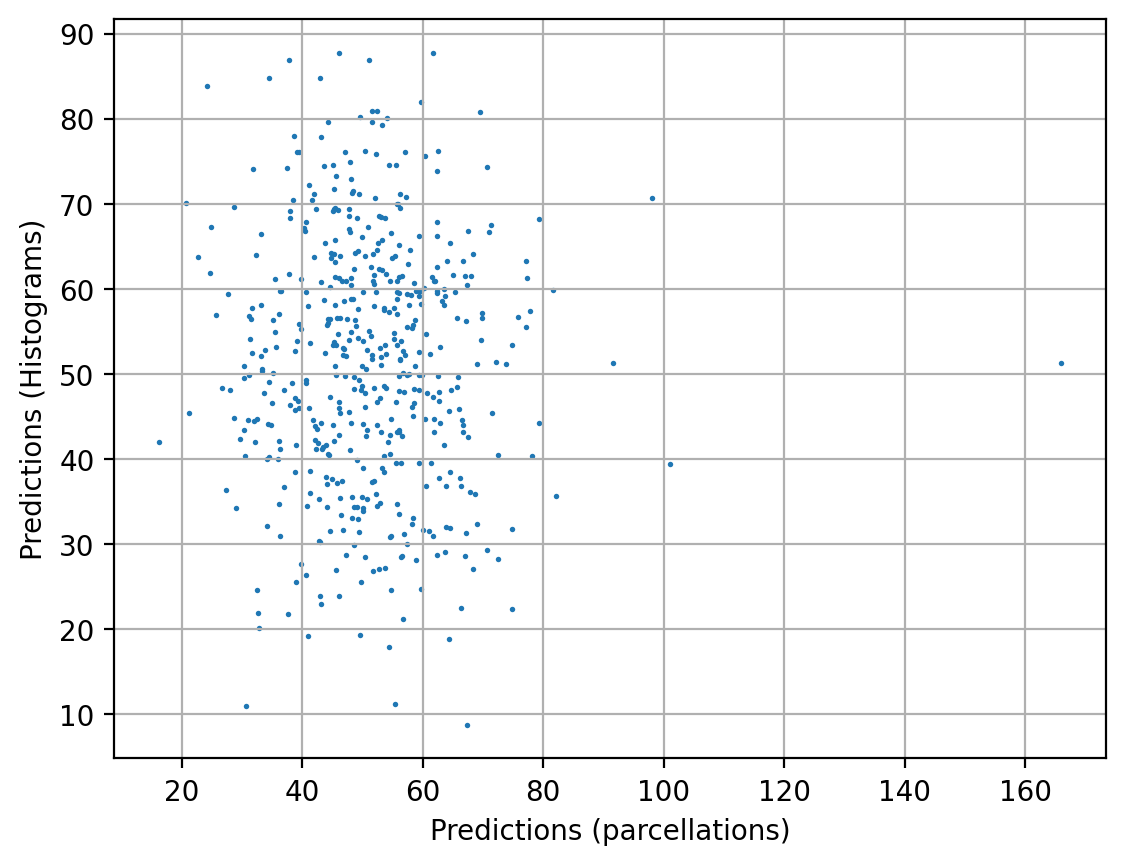

In [53]:
#With the outlier
plt.scatter(fold_predictions_hists['repeat0_p0'],fold_predictions_parcels['repeat0_p0'],s=0.9)
plt.xlabel('Predictions (parcellations)')
plt.ylabel('Predictions (Histograms)')
plt.grid()

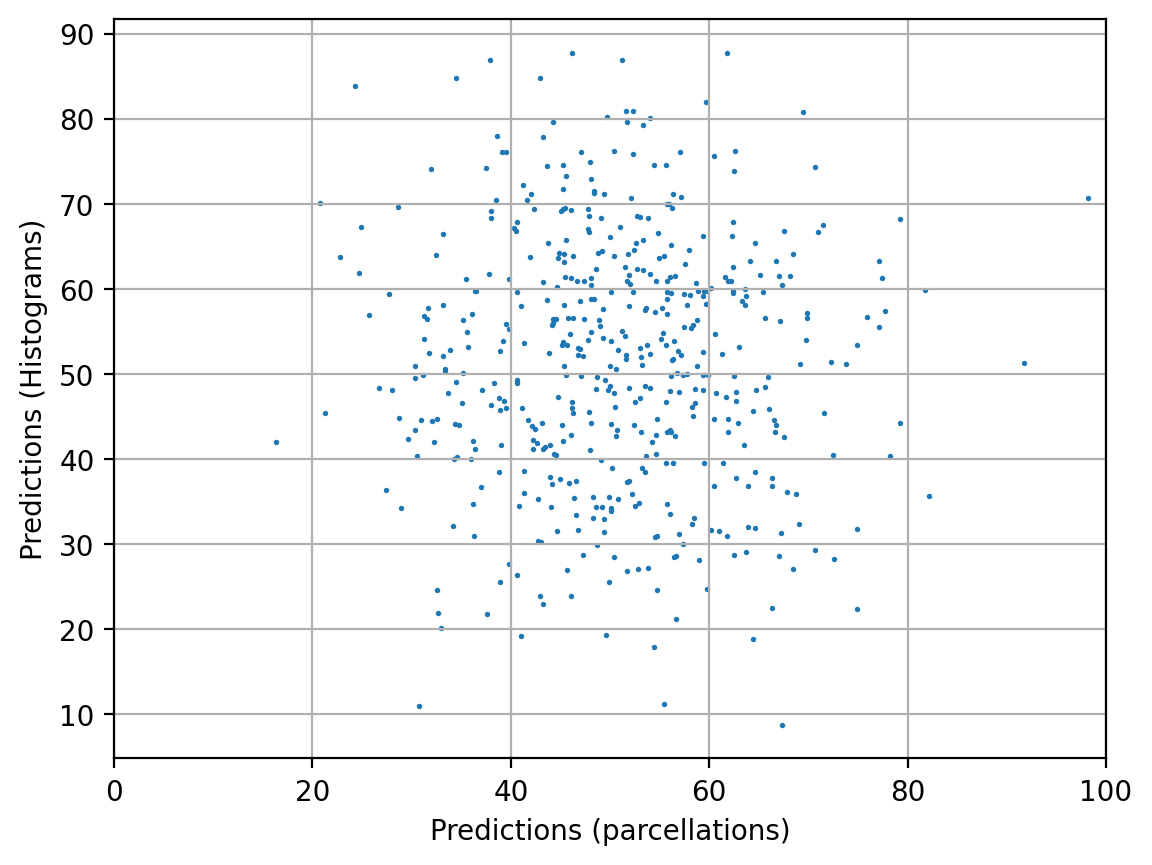

In [54]:
#Without the outlier
plt.scatter(fold_predictions_hists['repeat0_p0'],fold_predictions_parcels['repeat0_p0'],s=0.9)
plt.xlabel('Predictions (parcellations)')
plt.ylabel('Predictions (Histograms)')
plt.xlim(0,100)
plt.grid()